# EECS764P Coursework 2
- Name: Bheki Maenetja
- Student ID: 230382466

## Imports

In [1]:
import numpy as np
from scipy.stats import uniform, norm, cauchy, beta
from scipy.integrate import quad

# !pip install plotly
import plotly.graph_objects as go
import plotly.io as pio
# pio.renderers.default = "iframe"

## Plotting Functions

In [2]:
# Plotting functions
def plot_data(x=None, y=None, z=None, size=None, colour=None, title="", colour_title="", x_label="", y_label="", name="", mode="markers", text="", fill=None, **traces):
    """
    General purpose function for plotting scatter plots in plotly.
    """
    fig = go.Figure(layout={
        "title": title,
        "xaxis": {"title": x_label},
        "yaxis": {"title": y_label}
    })

    marker = dict()
    
    if size is not None:
        marker["size"] = size
        marker["sizeref"] = 0.01
    if colour is not None:
        marker["color"] = colour
        marker["showscale"] = True
        marker["colorbar"] = dict(title=colour_title)
    
    if z is None:
        data = go.Scatter(
            x=x,
            y=y,
            mode=mode,
            name=name,
            text=text,
            fill=fill,
            marker=marker,
        )
    else:
        data = go.Scatter3d(
            x=x,
            y=y,
            z=z,
            mode=mode,
            name=name,
            text=text,
            marker=marker,
        )

    if x is not None and y is not None:
        fig.add_trace(data)
    
    for t in traces:
        fig.add_trace(traces[t])
    
    return fig

def create_trace(x=None, y=None, z=None, size=None, colour=None, colour_title="", name="", mode="lines", text="", fill=None):
    marker = dict()
    
    if size is not None:
        marker["size"] = size
        marker["sizeref"] = 0.01
    if colour is not None:
        marker["color"] = colour
        marker["showscale"] = True
        marker["colorbar"] = dict(title=colour_title)
    
    if z is None:
        trace = go.Scatter(
            x=x,
            y=y,
            mode=mode,
            name=name,
            text=text,
            fill=fill,
            marker=marker
        )
    else:
        trace = go.Scatter3d(
            x=x,
            y=y,
            z=z,
            mode=mode,
            name=name,
            text=text,
            marker=marker
        )
    
    return trace

def create_histogram(x=None, y=None, histnorm="", name=""):
    return go.Histogram(
        x=x,
        y=None,
        histnorm=histnorm,
        name=name,
    )    

## Question 1

In [3]:
N = 30

x1 = norm.rvs(0,1,N) # sampling from N(0, 1)
x2 = norm.rvs(2,4,N) # sampling from N(2, 4)
x3 = uniform.rvs(0,1,N) # sampling from Unif(0,1)
x4 = x3 * uniform.rvs(0,1,N) # sampling from Unif(0,1)

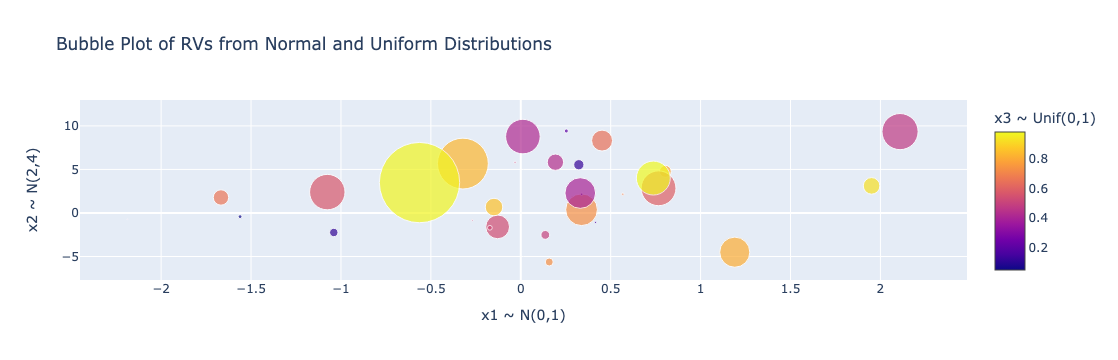

In [4]:
plot_data(
    x1, 
    x2, 
    colour=x3, 
    size=x4,
    title="Bubble Plot of RVs from Normal and Uniform Distributions",
    colour_title="x3 ~ Unif(0,1)",
    x_label="x1 ~ N(0,1)",
    y_label="x2 ~ N(2,4)",
    text=[f"Size = {x}" for x in x4],
)

x1 and x2 are represented by values on the x and y axis respectively; each (x,y) pairing represents the location of the centre of a circle. x3 is represented by the colour of the circles and x4 is represented by the size of the circles. In order for the plot to be legible x4 has had to be scaled (see plot_data function above). Given that x4 is essentially a multiple of x3 we observe that tuples with high values for x3 also have high values for x4; these tuples are represented by circles that are bigger and brighter.

## Question 2

In [5]:
N = 1000

x_norm = norm.rvs(size=N, random_state=456) # sampling from standard normal distribution
x_cauchy = cauchy.rvs(size=N, random_state=456) # sampling from standard cauchy distribution

p = np.linspace(0,100,100)
y_norm = np.percentile(x_norm, p)
y_cauchy = np.percentile(x_cauchy, p)

curve_trace = create_trace(y_norm, y_cauchy, mode="markers")
straight_trace = create_trace(y_norm, y_norm)

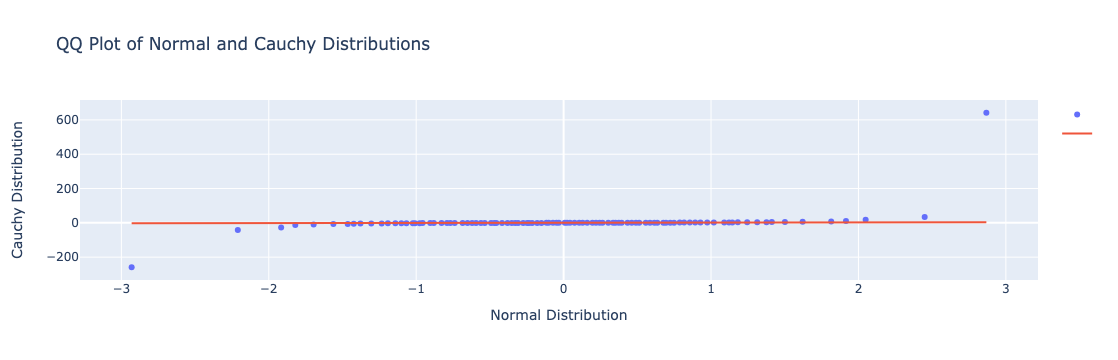

In [6]:
plot_data(
    x_label="Normal Distribution",
    y_label="Cauchy Distribution",
    title="QQ Plot of Normal and Cauchy Distributions", 
    t1=curve_trace, 
    t2=straight_trace
)

From the QQ plot we observe that the central quantiles of both distributions are actually quite similar. However, as we look at the extreme ends of the distributions we see a big divergence of the points from the line. This indicates that the Cauchy distribution has far more extreme values at both ends (i.e. heavier tails) than the normal distribution.

## Question 3

### 3.1) The Support fo Beta(2, 8) and Beta(8,2)

The support of Beta(2,8) is [0,1] and the support of Beta(8,2) is also [0,1]. However, the support of Beta(2,8) + Beta(8,2) is [0, 2].

### 3.2) Integrand of the Integral

In [7]:
def beta_sum(x, t):
    f1 = beta.pdf(x, 2, 8)
    f2 = beta.pdf(t - x, 8, 2) if t - x >= 0 else 0
    return f1 * f2

###  3.3) PDF of Beta(2,8) + Beta(8,2)

In [8]:
t_vals = np.linspace(0, 2, 100)
pdf_vals = []

for t in t_vals:
    pdf = quad(beta_sum, -np.inf, np.inf, args=(t))[0]
    pdf_vals.append(pdf)

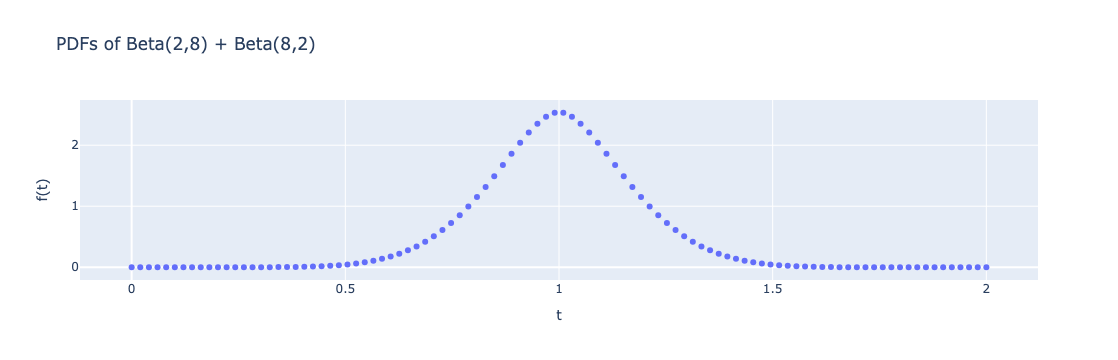

In [9]:
plot_data(
    t_vals, 
    pdf_vals,
    x_label="t",
    y_label="f(t)",
    title="PDFs of Beta(2,8) + Beta(8,2)",
)

### 3.4) Histogram

In [10]:
N = 10000

b1 = beta.rvs(2,8,size=N) # sampling from Beta(2,8)
b2 = beta.rvs(8,2,size=N) # sampling from Beta(8,2)
b_12 = b1 + b2 # adding both distributions

In [11]:
hist = create_histogram(b_12, histnorm="probability density", name="Sum of Beta Samples")
trace = create_trace(t_vals, pdf_vals, name="Beta Distribution PDF")

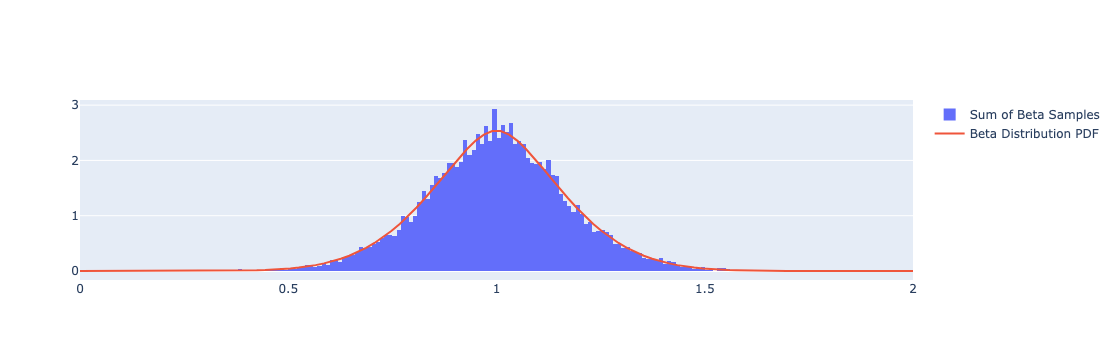

In [12]:
plot_data(t1=hist, t2=trace)

Looking at the above plot we observe that the sum of Beta(2,8) and Beta(8,2) appears to form a normal distribution with an approximate mean of 1 and a standard deviation roughly equal to 0.25.

## Question 4

### 4.1) Sample Mean Function

In [13]:
def sample_mean(m, n):
    return norm.rvs(size=[n, m]).mean(axis=1)

In [14]:
# Plotting
N = 10000

sm1 = sample_mean(10, N)
sm2 = sample_mean(100, N)
sm3 = sample_mean(1000, N)

hist1 = create_histogram(sm1, histnorm="probability density", name="Sample Mean Histogram for m = 10")
hist2 = create_histogram(sm2, histnorm="probability density", name="Sample Mean Histogram for m = 100")
hist3 = create_histogram(sm3, histnorm="probability density", name="Sample Mean Histogram for m = 1000")

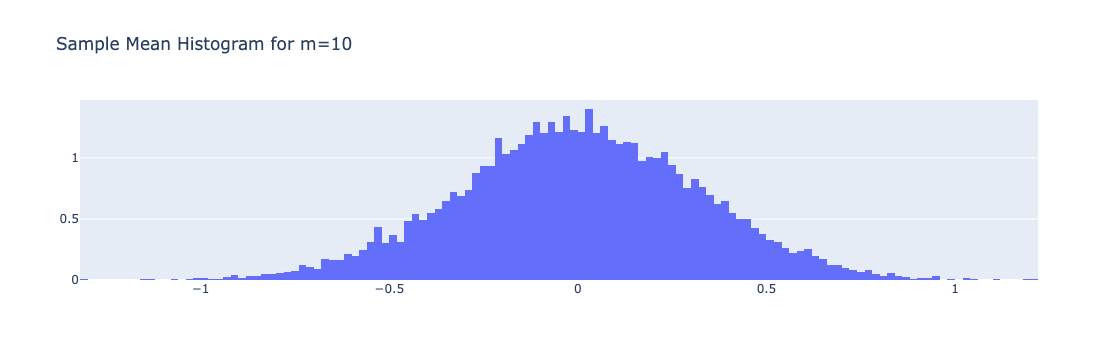

In [15]:
plot_data(t=hist1, title="Sample Mean Histogram for m=10")

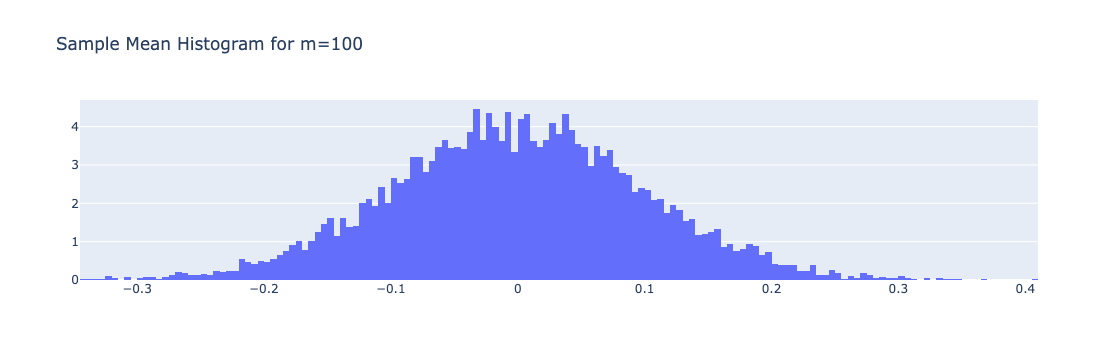

In [16]:
plot_data(t=hist2, title="Sample Mean Histogram for m=100")

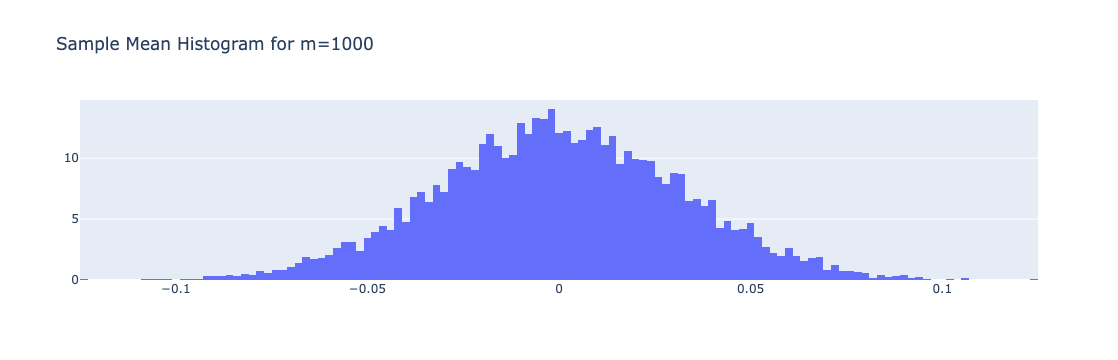

In [17]:
plot_data(t=hist3, title="Sample Mean Histogram for m=1000")

### 4.2) Sample Mean Distribution Class

In [18]:
class sample_mean_distribution:
    def __init__(self, m):
        self._m = m

    def norm_pdf(self, x, mu=0, std=1):
        new_std = (np.sqrt(self._m) * std) / self._m
        return norm.pdf(x, mu, new_std)

In [19]:
x = np.linspace(-2, 2, 1000)

smd1 = sample_mean_distribution(10)
smd2 = sample_mean_distribution(100)
smd3 = sample_mean_distribution(1000)

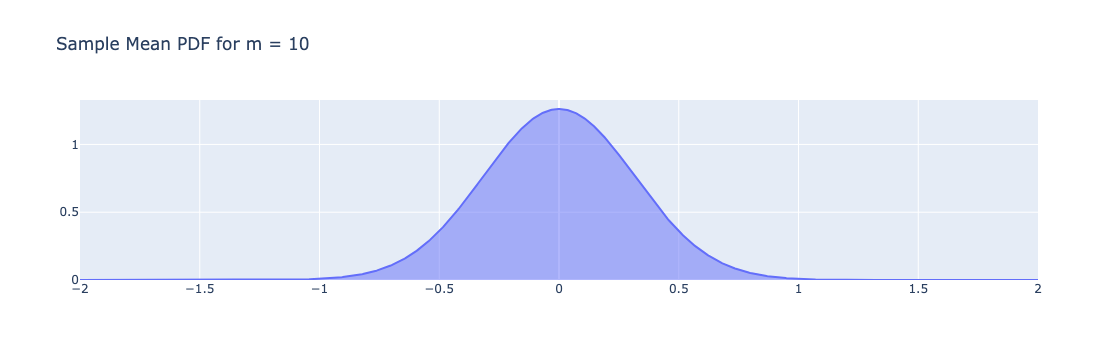

In [20]:
plot_data(x, smd1.norm_pdf(x), title="Sample Mean PDF for m = 10", mode="lines", fill="tozeroy")

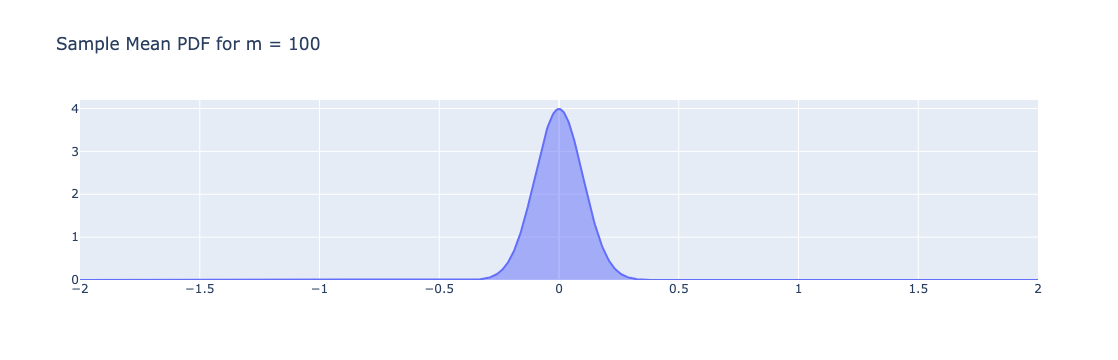

In [21]:
plot_data(x, smd2.norm_pdf(x), title="Sample Mean PDF for m = 100", mode="lines", fill="tozeroy")

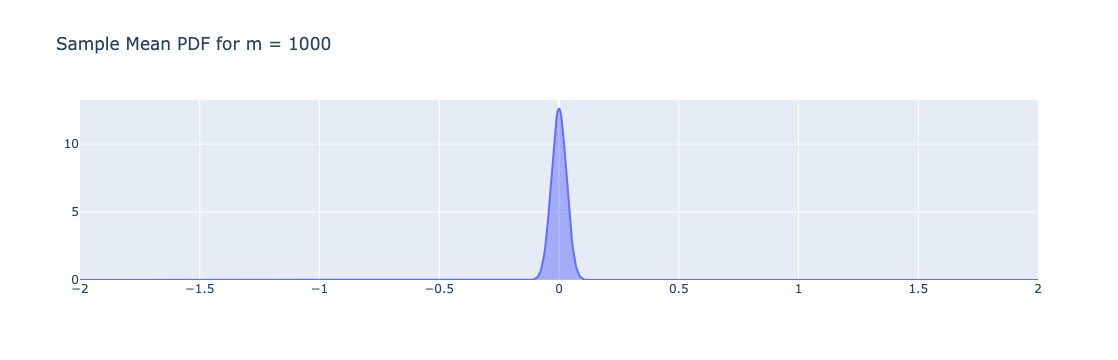

In [22]:
plot_data(x, smd3.norm_pdf(x), title="Sample Mean PDF for m = 1000", mode="lines", fill="tozeroy")

### 4.3) Plotting Sample Mean Distributions with Histograms

In [23]:
smd1_trace = create_trace(x, smd1.norm_pdf(x), name="Sample Mean PDF for m = 10", mode="lines")
smd2_trace = create_trace(x, smd2.norm_pdf(x), name="Sample Mean PDF for m = 100", mode="lines")
smd3_trace = create_trace(x, smd3.norm_pdf(x), name="Sample Mean PDF for m = 1000", mode="lines")

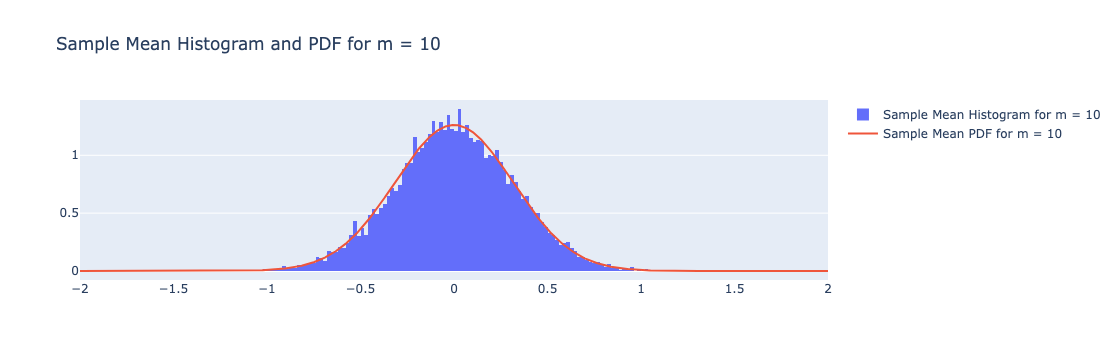

In [24]:
plot_data(t1=hist1, t2=smd1_trace, title="Sample Mean Histogram and PDF for m = 10")

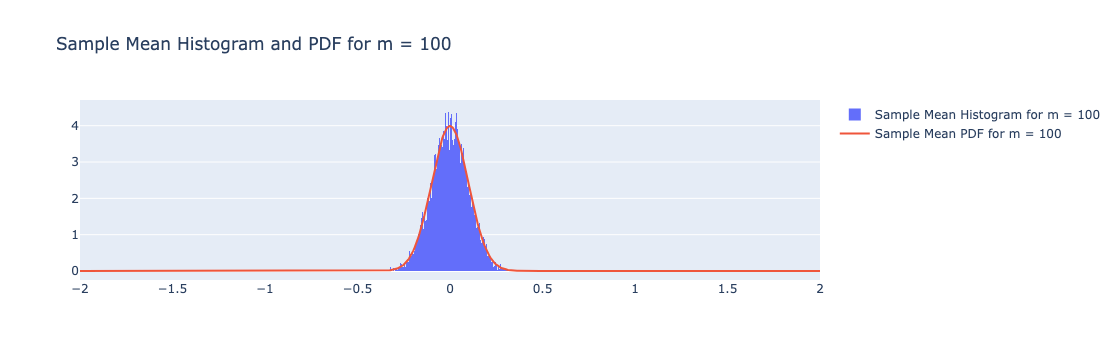

In [25]:
plot_data(t1=hist2, t2=smd2_trace, title="Sample Mean Histogram and PDF for m = 100")

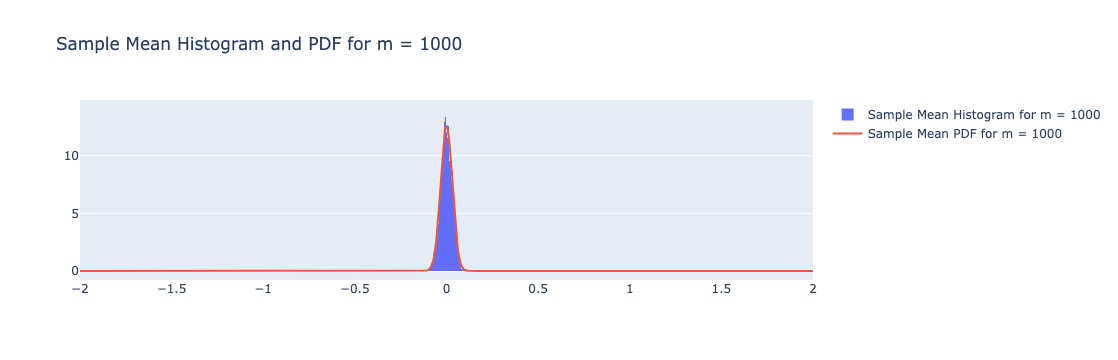

In [26]:
plot_data(t1=hist3, t2=smd3_trace, title="Sample Mean Histogram and PDF for m = 1000")

Conclusion: as m increases the distribution of the sample mean becomes focused around the true mean with the standard deviation decreasing as m increases; the plots become thinner with much lighter tails and a higher concentration of values at the mean. This results is consistent with the law of large numbers which states that the sample mean should converge as the number of samples increases.